In [1]:
import networkx as nx
import itertools
from matplotlib import rc
import random
import requests
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn import preprocessing
import re
import collections
from string import Template
import numpy
from pyparsing import Word, alphanums, Suppress, Optional, CharsNotIn, Group, nums, ZeroOrMore, OneOrMore,\
    cppStyleComment, printables
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.extern.six.moves import map, range

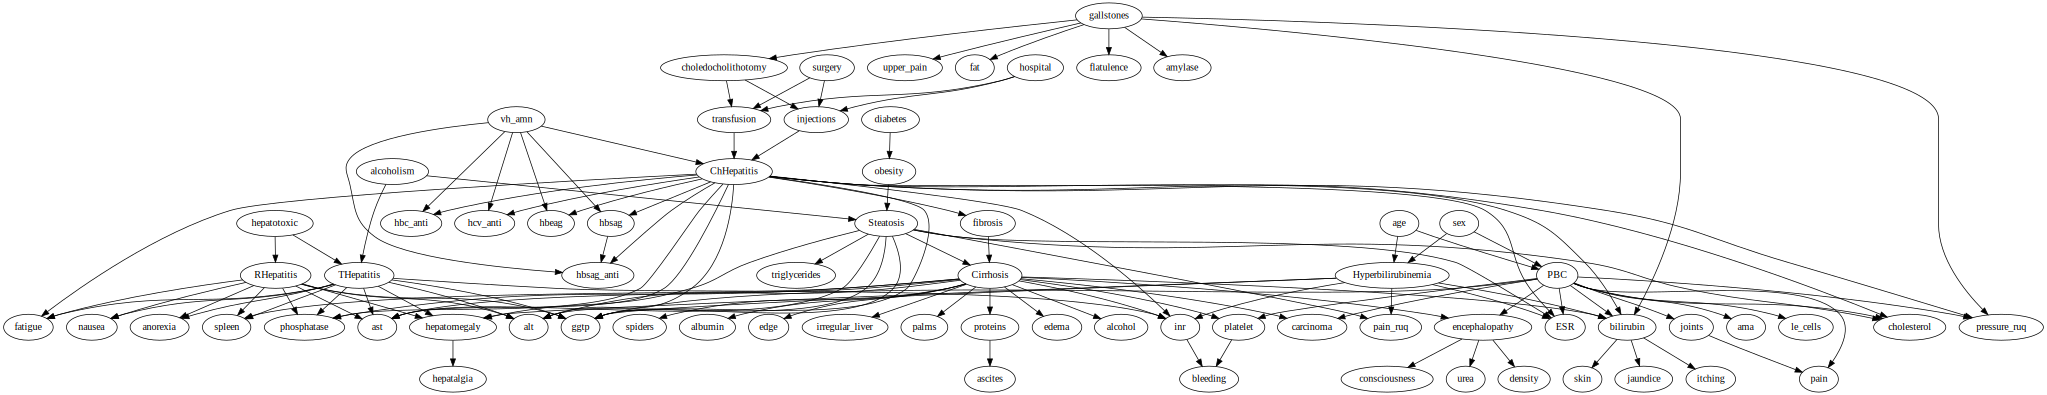

In [2]:
from pgmpy.readwrite import BIFReader
from graphviz import Digraph
# reader = BIFReader('../data/dataset/network.bif')
reader = BIFReader('../data/dataset/hepar2.bif') #hepar2
# !rm friends.bif
network = reader.get_model()
G=Digraph('network')
nodes=network.nodes()
edges=network.edges()
for a,b in edges:
    G.edge(a,b)
G

In [3]:
def get_parents(reader):
    net={}
    for block in reader.probability_block():
        
#         print('----------------------------------------------\n')
        
        #nodes list
        nodes=network.nodes()
        nodes_l=net.setdefault('V',list(nodes))
        
        #edge list
        edges=network.edges()
        edges_l=net.setdefault('E',list(edges))
#         print('edges:%s'%edges)
        
        #generate name
        data=net.setdefault('data',{})
        parent_dict={}
        name = reader.probability_expr.searchString(block)[0][0]
        name1=data.setdefault(name,{})
#         print('-------------------------')
#         print('name:%s'%name)   
        
       #variable state list         
        variable_state=reader.variable_states[name]
        variable_state1=name1.setdefault('state',variable_state)
        
        #state num
        state_num=len(variable_state)
        state_num1=name1.setdefault('state_num',state_num)
        
        #parents list
        parents=reader.get_parents()
        parent_name=[v for u,v in parents.items() if u==name][0]
        if len(parent_name)==0:
            parent_name=[]
        parent_name1=name1.setdefault('parents',parent_name)
        
        #child list
        child_name=[v for u, v in network.edges() if u == name]
#         print('{"%s":%s}'%(name,child_name))
        if len(child_name)==0:
            child_name =[]
        # network.successors('age')
        child_name1=name1.setdefault('children',child_name)

        #cpd list
        cpds = reader.cpd_expr.searchString(block)
#         print('cpds:%s'%cpds)
        arr = [float(j) for i in cpds for j in i]
#         print('arr:%s'%arr)
        l_arr=len(arr)
        l_states=len(variable_state)
        cpds_list = [arr[i:i+l_states] for i in range(0,l_arr,l_states)]
#         print('cpds_list:%s'%cpds_list)
    
        #parent state list
        word_expr2 = Word(initChars=printables, excludeChars=['{','}', ')', ',',' ', '(',';','|']) + Suppress(Optional(","))
        optional_expr = Suppress('(') + OneOrMore(word_expr2)+ Suppress(')')
        parent_states=optional_expr.searchString(block)
        l=len(parent_states)
#         print('l_names:%s'%l)
        if l==1:
            parent_states=[[x] for x in variable_state]
            cpds_list=[[x] for x in cpds_list[0]]
            l=len(parent_states)
            for i in range(l):
                parent_states[i]=str(parent_states[i])
                parent_dict[parent_states[i]]=list(cpds_list[i])
            parent_dict=name1.setdefault('cpds',parent_dict)
#             print('parent_states:%s'%parent_states)
#             print('cpds_list:%s'%cpds_list)
#         print(type(parent_states))
        else:
            #cpd and parent_state generate dict
            for i in range(l):
                parent_states[i]=str(parent_states[i])
                parent_dict[parent_states[i]]=list(cpds_list[i])
    #             print('parent_dict:%s'%parent_dict)
            parent_dict=name1.setdefault('cpds',parent_dict)
#             print('parent_states:%s'%parent_states)
    #         print('data:%s'%data)
    return net
net=get_parents(reader)
f=open('net.txt','w')
f.write(str(net))
net

{'V': ['alcoholism',
  'vh_amn',
  'hepatotoxic',
  'THepatitis',
  'hospital',
  'surgery',
  'gallstones',
  'choledocholithotomy',
  'injections',
  'transfusion',
  'ChHepatitis',
  'sex',
  'age',
  'PBC',
  'fibrosis',
  'diabetes',
  'obesity',
  'Steatosis',
  'Cirrhosis',
  'Hyperbilirubinemia',
  'triglycerides',
  'RHepatitis',
  'fatigue',
  'bilirubin',
  'itching',
  'upper_pain',
  'fat',
  'pain_ruq',
  'pressure_ruq',
  'phosphatase',
  'skin',
  'ama',
  'le_cells',
  'joints',
  'pain',
  'proteins',
  'edema',
  'platelet',
  'inr',
  'bleeding',
  'flatulence',
  'alcohol',
  'encephalopathy',
  'urea',
  'ascites',
  'hepatomegaly',
  'hepatalgia',
  'density',
  'ESR',
  'alt',
  'ast',
  'amylase',
  'ggtp',
  'cholesterol',
  'hbsag',
  'hbsag_anti',
  'anorexia',
  'nausea',
  'spleen',
  'consciousness',
  'spiders',
  'jaundice',
  'albumin',
  'edge',
  'irregular_liver',
  'hbc_anti',
  'hcv_anti',
  'palms',
  'hbeag',
  'carcinoma'],
 'E': [('alcoholism'

In [8]:
f = open("net.txt",'w')

f.write(str(net))
# f.close()

3724

In [4]:
def choose_random_state(node, network):
    '''
    Assigns a random state to a given node, like assign 'small' to size
    @param node:
    @param network:
    @return:
    '''
    state_num_r = network['data'][node]['state_num']
    random_index = random.randint(0,  state_num_r - 1)
    return network['data'][node]['state'][random_index]

nodes = net['V']
for node in nodes:
    print(' %s:%s ' %(node,choose_random_state(node, net)))
#     print(node,choose_random_state(node, network))

 alcoholism:present 
 vh_amn:present 
 hepatotoxic:absent 
 THepatitis:absent 
 hospital:absent 
 surgery:absent 
 gallstones:present 
 choledocholithotomy:present 
 injections:absent 
 transfusion:present 
 ChHepatitis:absent 
 sex:male 
 age:age31_50 
 PBC:present 
 fibrosis:present 
 diabetes:present 
 obesity:present 
 Steatosis:present 
 Cirrhosis:decompensate 
 Hyperbilirubinemia:present 
 triglycerides:a1_0 
 RHepatitis:absent 
 fatigue:absent 
 bilirubin:a6_2 
 itching:present 
 upper_pain:absent 
 fat:absent 
 pain_ruq:absent 
 pressure_ruq:absent 
 phosphatase:a699_240 
 skin:absent 
 ama:present 
 le_cells:present 
 joints:absent 
 pain:absent 
 proteins:a10_6 
 edema:absent 
 platelet:a99_0 
 inr:a200_110 
 bleeding:absent 
 flatulence:present 
 alcohol:present 
 encephalopathy:present 
 urea:a49_40 
 ascites:present 
 hepatomegaly:absent 
 hepatalgia:present 
 density:present 
 ESR:a49_15 
 alt:a34_0 
 ast:a149_40 
 amylase:a499_300 
 ggtp:a69_30 
 cholesterol:a999_350 
 h

In [5]:
def choose_non_evidence_node(non_evidence_nodes):
    '''
    choose a random non-evidence node in the current iteration
    @param non_evidence_nodes:
    @return:
    '''
    return non_evidence_nodes[random.randint(0, len(non_evidence_nodes) - 1)]

nodes=net['V']
evidence={'schools': 'good', 'neighborhood':'bad'}
non_evidence_nodes = [node for node in nodes if node not in evidence.keys()]
print('non_evidence_nodes:%s'%non_evidence_nodes)
for i in range(len(non_evidence_nodes)):
    a=non_evidence_nodes.pop()
    print('a:%s'%a)
# print(choose_non_evidence_node(non_evidence_nodes))

non_evidence_nodes:['alcoholism', 'vh_amn', 'hepatotoxic', 'THepatitis', 'hospital', 'surgery', 'gallstones', 'choledocholithotomy', 'injections', 'transfusion', 'ChHepatitis', 'sex', 'age', 'PBC', 'fibrosis', 'diabetes', 'obesity', 'Steatosis', 'Cirrhosis', 'Hyperbilirubinemia', 'triglycerides', 'RHepatitis', 'fatigue', 'bilirubin', 'itching', 'upper_pain', 'fat', 'pain_ruq', 'pressure_ruq', 'phosphatase', 'skin', 'ama', 'le_cells', 'joints', 'pain', 'proteins', 'edema', 'platelet', 'inr', 'bleeding', 'flatulence', 'alcohol', 'encephalopathy', 'urea', 'ascites', 'hepatomegaly', 'hepatalgia', 'density', 'ESR', 'alt', 'ast', 'amylase', 'ggtp', 'cholesterol', 'hbsag', 'hbsag_anti', 'anorexia', 'nausea', 'spleen', 'consciousness', 'spiders', 'jaundice', 'albumin', 'edge', 'irregular_liver', 'hbc_anti', 'hcv_anti', 'palms', 'hbeag', 'carcinoma']
a:carcinoma
a:hbeag
a:palms
a:hcv_anti
a:hbc_anti
a:irregular_liver
a:edge
a:albumin
a:jaundice
a:spiders
a:consciousness
a:spleen
a:nausea
a:anor

In [6]:
def update_value(node, network, simulation):
    '''
    update the value of node in previous iteration
    @param node:
    @param network:
    @param simulation:
    @return:
    '''
    parents_current = network['data'][node]['parents']
#     print('parents_current:%s'%parents_current)
    childrens_current = network['data'][node]['children']
    all_child_prob = 1
    parent_prob = network['data'][node]['cpds']
    # prob = 1

    # temp = np.array(list(network['data'][node]['prob'].values()))[:, 0]
    if parents_current:
        values_parents = [simulation[-1][parent] for parent in parents_current]
#         print('values_parents:%s'%values_parents)
        parent_prob = network['data'][node]['cpds'][str(values_parents)]
#         print('parent_prob:%s'%parent_prob)
    else:
         # The node has no parent and we can update it based on the prior
#         parent_prob =[network['data'][node]['cpds'][values_node] for values_node in network['data'][node]['cpds'].values()]
        parent_prob =[j for i in network['data'][node]['cpds'].values() for j in i]
#         print('parent_prob:%s'%parent_prob)
        parent_prob=np.array(parent_prob)
#         parent_prob= parent_prob[:,0]
#         print('parent_prob:%s'%parent_prob)

    if childrens_current is not None:
        child_prob = []
#         print('childrens_current:%s'%childrens_current)
        for child in childrens_current:
            condition_set = []
            child_value = simulation[-1][child]
            child_index = network['data'][child]['state'].index(child_value)
            
            parent_of_child = network['data'][child]['parents']
            node_index = network['data'][child]['parents'].index(node)
            values_parent_of_child = [simulation[-1][parent] for parent in parent_of_child]
#             print('parent_of_[%s]_children:%s'%(child,parent_of_child))
#             print('values_parent_of_[%s]_children:%s'%(child,values_parent_of_child))
            
            for state in network['data'][node]['state']:
                # print(state)
                values_parent_of_child[node_index] = state
                
                condition_set.append(network['data'][child]['cpds'][str(values_parent_of_child)])
            condition_set = np.array(condition_set)
            child_prob.append(condition_set[:,child_index])
           
        for row in range(len(child_prob)):
            all_child_prob = np.multiply(all_child_prob, child_prob[row])

#     print('all_child_prob:%s'%all_child_prob)
    prob = np.multiply(all_child_prob, parent_prob)
    prob_norm = prob / max(np.cumsum(prob))
    prob_norm = np.cumsum(prob_norm)

    choice = random.random()
    index = np.argmax(prob_norm > choice)
    # print(choice ,cumsum)
    return network['data'][node]['state'][index]

In [7]:
def gibbs_sampling(network, evidence,node_to_query, niter, num_drop):
    simulation = []  #起始样本，与证据E=e相一致的样本D1作为起始样本

    nodes = net['V']
    # node_to_query='size'

    # evidence={'schools': 'good','neighborhood':'bad'}
    non_evidence_nodes = [node for node in nodes if node not in evidence.keys()]
#     print('non_evidence_nodes:%s'%non_evidence_nodes)
    # First iteration random value for all nodes
    d = {}
    for node in nodes:
        d[node] = choose_random_state(node, network)
#     print('d:%s'%d)
        # Put evidence
    for node in evidence:
        d[node] = evidence[node]
#     print('d:%s'%d)

    simulation.append(d.copy())  #起始样本，与证据E=e相一致的样本D1作为起始样本
#     print('initial_simulation:%s'%simulation)
    for count in range(niter-1):
        # Pick up a random node to start
        current_node_to_update = choose_non_evidence_node(non_evidence_nodes)
#         current_node_to_update =non_evidence_node.pop()
#         for i in len(non_evidence_nodes):
            
#         print('--------------------------------------')
#         print('current_node_to_update:%s'%current_node_to_update)
#         print('current_node_value:%s'%network['data'][current_node_to_update]['state'])
        d[current_node_to_update] = update_value(current_node_to_update, network, simulation)
        simulation.append(d.copy())
#     for i in range(len(simulation)):
#         print('第%d次：%s\n'%(i,simulation[i]))

    after_removing_burnt_samples = simulation[int(num_drop):]
    # range(len(after_removing_burnt_samples))
    # after_removing_burnt_samples[2]
#     print('--------------------------------------')
#     for j in range(len(after_removing_burnt_samples)):
#         print('第%d次：%s\n'%(j+5,after_removing_burnt_samples[j]))

    to_query_node=list(node_to_query.keys())[0]
    count = {val: 0 for val in network['data'][to_query_node]['state']}
#     print('----------------------------------------')
    print('count',count)

    for assignment in after_removing_burnt_samples:
    #     print(assignment[node_to_query])
        count[assignment[to_query_node]] += 1
#     print('**********************************')
    print(count)
    # print(assignment[node_to_query])

    for l in count:
        probabilites[l] = count[l] * 1.0 / (iterations - num_drop)

#     print('--------------------------------------')
#     print('probabilites:%s'%probabilites)
    to_query_node_val=list(node_to_query.values())[0]
    probabilites_val=probabilites[to_query_node_val]
#     print('probabilites_val:%s'%probabilites_val)
#     data=[]
#     temp = list(probabilites.values())
#     data.append(temp)
#     print('--------------------------------------')
#     print(data)
#     data = np.array(data)
#     print('--------------------------------------')
#     print(data)
#     data.shape[1] 
    return probabilites

In [38]:
sampling_method = 'gibbs'
#'hepatotoxic':'present'
# node_to_query ={'location':'good'} 
# evidence={'amenities':'lots','neighborhood':'bad','age':'old'} #'age':'old'

node_to_query={'hepatotoxic':'present'}
evidence={'THepatitis ':'present','hospital':'present','surgery':'present','gallstones':'present'}  #'hospital':'present','surgery':'present','gallstones':'present'

niter=10000
num_drop = 40
iterations=10000
probabilites={}
# num_update_list = np.arange(1, 12, 2)
print('evidence:%s'%evidence)
# for iterations in num_update_list:
probabilites = gibbs_sampling(net, evidence,node_to_query,iterations, num_drop)
print('probabilites:%s'%probabilites)

evidence:{'THepatitis ': 'present', 'hospital': 'present', 'surgery': 'present', 'gallstones': 'present'}
count {'present': 0, 'absent': 0}
{'present': 1408, 'absent': 8552}
probabilites:{'present': 0.14136546184738955, 'absent': 0.8586345381526105}


In [14]:
from pgmpy.inference import VariableElimination
network_infer = VariableElimination(network)
edge_net=network.edges()
# f=open('gibbs_data_test1.txt','w')
f=open('net.txt','a')
print(edge_net)
print(edge_net,file=f)
for u,v in edge_net:
#     print('u:%s,v:%s'%(u,v))
#     print(u,v)
    q=network_infer.query(variables=[v],evidence={u:0})
    print('%s %s %0.2f'%(u,v,q[v].values[0]))
    print('%s %s %0.2f'%(u,v,q[v].values[0]),file=f)
f.close()
# q=network_infer.query(variables=['price'],evidence={'age':0})
str(q['price'])

[('amenities', 'location'), ('location', 'age'), ('location', 'price'), ('neighborhood', 'location'), ('neighborhood', 'children'), ('children', 'schools'), ('age', 'price'), ('schools', 'price'), ('size', 'price')]
amenities location 0.60
location age 0.30
location price 0.36


E:\Anaconda\lib\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:586: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  phi.values = phi.values[slice_]
E:\Anaconda\lib\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:598: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  phi1.values = phi1.values[slice_]


neighborhood location 0.23
neighborhood children 0.60
children schools 0.70
age price 0.61
schools price 0.55
size price 0.56


'╒═════════╤══════════════╕\n│ price   │   phi(price) │\n╞═════════╪══════════════╡\n│ price_0 │       0.5612 │\n├─────────┼──────────────┤\n│ price_1 │       0.3300 │\n├─────────┼──────────────┤\n│ price_2 │       0.1088 │\n╘═════════╧══════════════╛'